In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import train_test_split
import optuna
from functools import partial
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('C:/Users/jakub/Desktop/Nauka/Projekty/titanic spaceship/train.csv')

In [33]:
df.shape

(8693, 14)

In [35]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [32]:
df_true = df[df.Transported == True]
df_true.shape

(4378, 14)

In [31]:
df_false = df[df.Transported == False]
df_false.shape

(4315, 14)

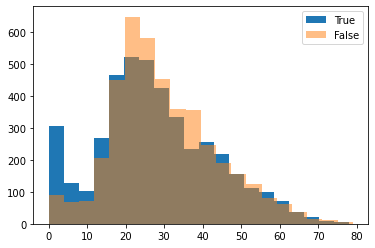

In [8]:
plt.hist(df_true.Age, label = 'True', bins = 20)
plt.hist(df_false.Age, alpha = 0.5, label = 'False', bins = 20)
plt.legend()
plt.show()

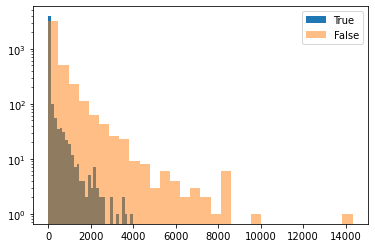

In [9]:
plt.hist(df_true.RoomService, label = 'True', bins = 30)
plt.hist(df_false.RoomService, alpha = 0.5, label = 'False', bins = 30)
plt.yscale('log')
plt.legend()
plt.show()

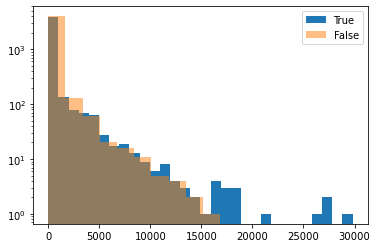

In [10]:
plt.hist(df_true.FoodCourt, label = 'True', bins = 30)
plt.hist(df_false.FoodCourt, alpha = 0.5, label = 'False')
plt.yscale('log')
plt.legend()
plt.show()

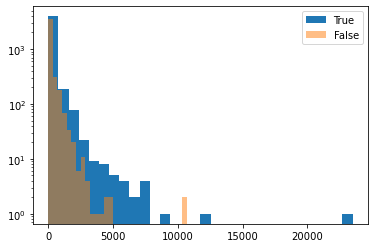

In [11]:
plt.hist(df_true.ShoppingMall, label = 'True', bins = 30)
plt.hist(df_false.ShoppingMall, alpha = 0.5, label = 'False', bins = 30)
plt.yscale('log')
plt.legend()
plt.show()

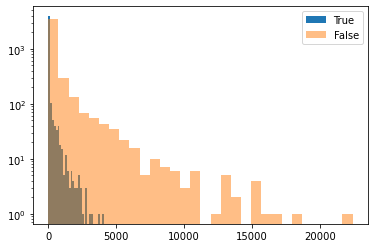

In [12]:
plt.hist(df_true.Spa, label = 'True', bins = 30)
plt.hist(df_false.Spa, alpha = 0.5, label = 'False', bins = 30)
plt.yscale('log')
plt.legend()
plt.show()

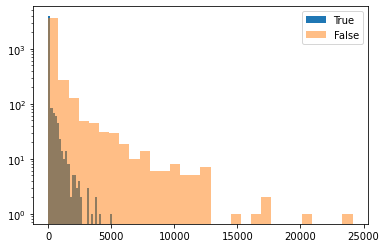

In [13]:
plt.hist(df_true.VRDeck, label = 'True', bins = 30)
plt.hist(df_false.VRDeck, alpha = 0.5, label = 'False', bins = 30)
plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
###    from pandas_profiling import ProfileReport

In [19]:
#prof = ProfileReport(df) 
#prof.to_file(output_file='C:/Users/jakub/Desktop/Nauka/Projekty/titanic spaceship/df_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
#prof = ProfileReport(df_true) 
#prof.to_file(output_file='C:/Users/jakub/Desktop/Nauka/Projekty/titanic spaceship/df_true_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
#prof = ProfileReport(df_false) 
#prof.to_file(output_file='C:/Users/jakub/Desktop/Nauka/Projekty/titanic spaceship/df_false_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [29]:
df[df.isnull().any(axis=1) == 0].shape

(6606, 14)

In [9]:
df_nonull = df[df.isnull().any(axis=1) == 0]
df_nonull = df_nonull.reset_index()

In [10]:
df_nonull[df_nonull.Transported == False].shape

(3279, 15)

In [11]:
df_nonull[df_nonull.Transported == True].shape

(3327, 15)

In [12]:
df_nonull = df_nonull.drop("PassengerId", axis = 1)
df_nonull = df_nonull.drop("Name", axis = 1)
df_nonull = df_nonull.drop("Cabin", axis = 1)

In [13]:
df_nonull = df_nonull.reset_index(drop = True)

In [14]:
X = df_nonull.drop("Transported", axis = 1)
y = df_nonull.Transported

In [15]:
X = pd.get_dummies(X)

In [18]:
X, X_valid, y, y_valid = train_test_split(X, y, test_size=0.2, random_state=1)

In [26]:
 def optimize(trial, x, y):
    
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    n_estimators = trial.suggest_int("n_estimators", 100, 4000)
    max_depth = trial.suggest_int("max_depth", 3, 30)
    max_features = trial.suggest_uniform("max_features", 0.01, 1.0)
    
    model = ensemble.RandomForestClassifier(
        n_estimators = n_estimators,
        max_depth = max_depth,
        max_features = max_features,
        criterion = criterion
    )
    
    kf = model_selection.StratifiedKFold(n_splits = 5)
    accuracies = []
    
    for idx in kf.split(X = x, y = y):
        train_idx, test_idx = idx[0], idx[1]
        
        xtrain = x.iloc[train_idx]
        ytrain = y.iloc[train_idx]
        
        xtest = x.iloc[test_idx]
        ytest = y.iloc[test_idx]
        
        model.fit(xtrain, ytrain)
        preds = model.predict(xtest)
        fold_acc = metrics.accuracy_score(ytest, preds)
        accuracies.append(fold_acc)
    
    return -1.0 * np.mean(accuracies)

In [27]:
optimization_function = partial(optimize, x = X, y = y)

study = optuna.create_study(direction = "minimize")
study.optimize(optimization_function, n_trials = 10)

[I 2022-04-06 15:06:23,983] A new study created in memory with name: no-name-4770c314-ab43-49d7-a373-b622e31ada73
[I 2022-04-06 15:09:52,118] Trial 0 finished with value: -0.7797146010722169 and parameters: {'criterion': 'gini', 'n_estimators': 3774, 'max_depth': 26, 'max_features': 0.9504205435085149}. Best is trial 0 with value: -0.7797146010722169.
[I 2022-04-06 15:11:25,407] Trial 1 finished with value: -0.7912588515237522 and parameters: {'criterion': 'entropy', 'n_estimators': 2684, 'max_depth': 10, 'max_features': 0.5549778735515771}. Best is trial 1 with value: -0.7912588515237522.
[I 2022-04-06 15:11:34,504] Trial 2 finished with value: -0.7910680241392162 and parameters: {'criterion': 'entropy', 'n_estimators': 529, 'max_depth': 5, 'max_features': 0.3550505271279936}. Best is trial 1 with value: -0.7912588515237522.
[I 2022-04-06 15:12:13,212] Trial 3 finished with value: -0.7498149063960321 and parameters: {'criterion': 'entropy', 'n_estimators': 1672, 'max_depth': 3, 'max_f

In [36]:
study.best_trial

FrozenTrial(number=1, values=[-0.7912588515237522], datetime_start=datetime.datetime(2022, 4, 6, 15, 9, 52, 120248), datetime_complete=datetime.datetime(2022, 4, 6, 15, 11, 25, 406537), params={'criterion': 'entropy', 'n_estimators': 2684, 'max_depth': 10, 'max_features': 0.5549778735515771}, distributions={'criterion': CategoricalDistribution(choices=('gini', 'entropy')), 'n_estimators': IntUniformDistribution(high=4000, low=100, step=1), 'max_depth': IntUniformDistribution(high=30, low=3, step=1), 'max_features': UniformDistribution(high=1.0, low=0.01)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=1, state=TrialState.COMPLETE, value=None)